# Assignment 7 Solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**QUESTION 1**

In [3]:
df = pd.read_csv('http://www.math.ubc.ca/~pwalls/data/a7_diseases.csv')

In [4]:
df.head()

,Disease,Fiscal Year,Gender,Age Group,Population,Incidence,Prevalence,Mortality with Disease,Mortality without Disease
0,Diabetes,1999,F,1 to 4,651470,150,340,0,220
1,Diabetes,1999,F,5 to 9,918920,280,1230,0,110
2,Diabetes,1999,F,10 to 14,910710,390,2250,0,100
3,Diabetes,1999,F,15 to 19,918890,480,3360,10,280
4,Diabetes,1999,F,20 to 24,913070,700,4570,10,310


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744 entries, 0 to 3743
Data columns (total 9 columns):
Disease                      3744 non-null object
Fiscal Year                  3744 non-null int64
Gender                       3744 non-null object
Age Group                    3744 non-null object
Population                   3744 non-null int64
Incidence                    2640 non-null float64
Prevalence                   3744 non-null int64
Mortality with Disease       2304 non-null float64
Mortality without Disease    2304 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 292.5+ KB


In [6]:
df['Fiscal Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010])

In [7]:
df['Age Group'].unique()

array(['1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79',
       '80 to 84', '85+', '<1'], dtype=object)

In [8]:
df['Disease'].unique()

array(['Diabetes', 'Hypertension', 'Mental_Illness',
       'MoodAnxiety_Disorder', 'Asthma', 'COPD', 'IHD', 'AMI',
       'Heart_Failure', 'Osteoporosis', 'Hip_Fracture'], dtype=object)

**QUESTION 2**

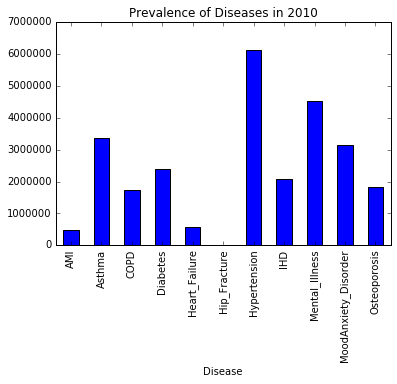

In [12]:
df[df['Fiscal Year'] == 2010].groupby('Disease').Prevalence.sum().plot(kind='bar',title='Prevalence of Diseases in 2010')

**QUESTION 3**

In [13]:
ages = ['<1','1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79',
       '80 to 84', '85+']

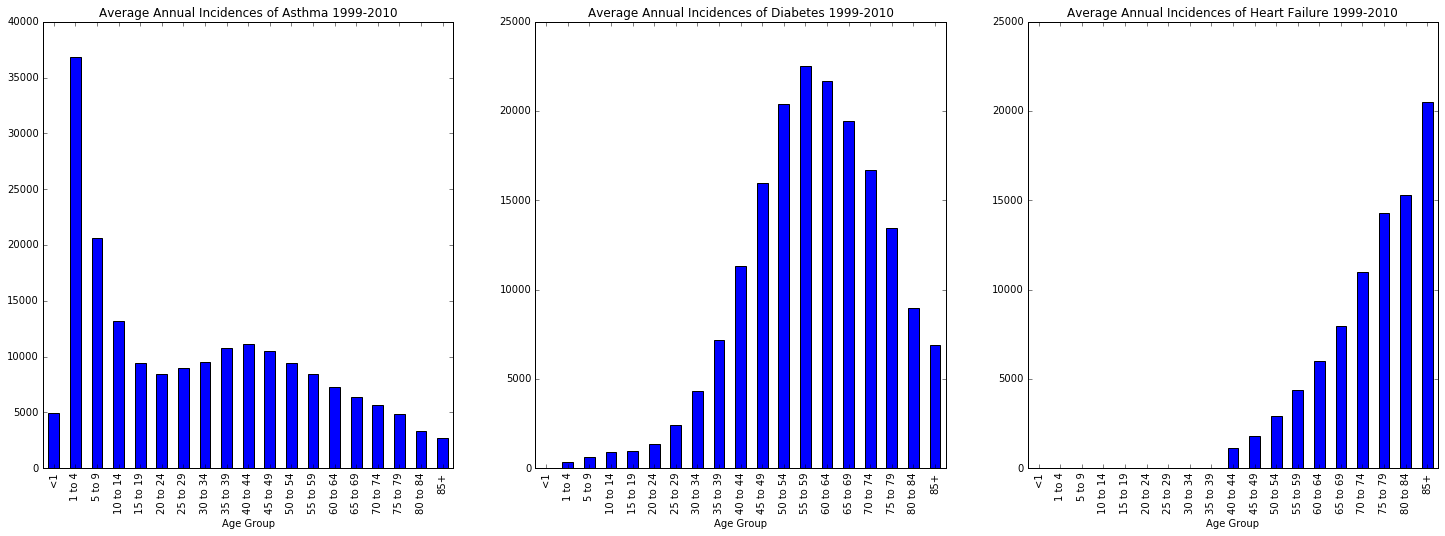

In [14]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
asthma = df[df['Disease']=='Asthma'].groupby('Age Group').Incidence.sum().reindex(ages) / 12
asthma.plot(kind='bar',title='Average Annual Incidences of Asthma 1999-2010')

plt.subplot(1,3,2)
diabetes = df[df['Disease']=='Diabetes'].groupby('Age Group').Incidence.sum().reindex(ages) / 12
diabetes.plot(kind='bar',title='Average Annual Incidences of Diabetes 1999-2010')

plt.subplot(1,3,3)
heart = df[df['Disease']=='Heart_Failure'].groupby('Age Group').Incidence.sum().reindex(ages) / 12
heart.plot(kind='bar',title='Average Annual Incidences of Heart Failure 1999-2010')
plt.savefig('a7_q3.png')

**QUESTION 4**

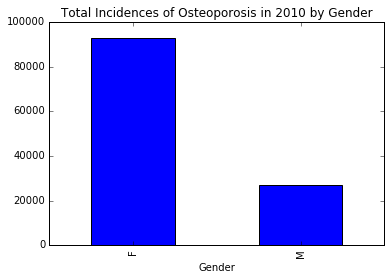

In [15]:
osteo = df[(df['Disease'] == 'Osteoporosis') & (df['Fiscal Year'] == 2010)].groupby('Gender').Incidence.sum()
osteo.plot(kind='bar',title='Total Incidences of Osteoporosis in 2010 by Gender')